# lab1

1. Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора.  Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

    调查训练样本量和测试数据量如何影响使用天真贝叶斯分类器对井字棋（tic_tac_toe.txt）和垃圾邮件（spam.csv）数据集的分类准确性。 绘制训练样本和测试样本的准确度依赖性，作为其相关性的函数。


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/

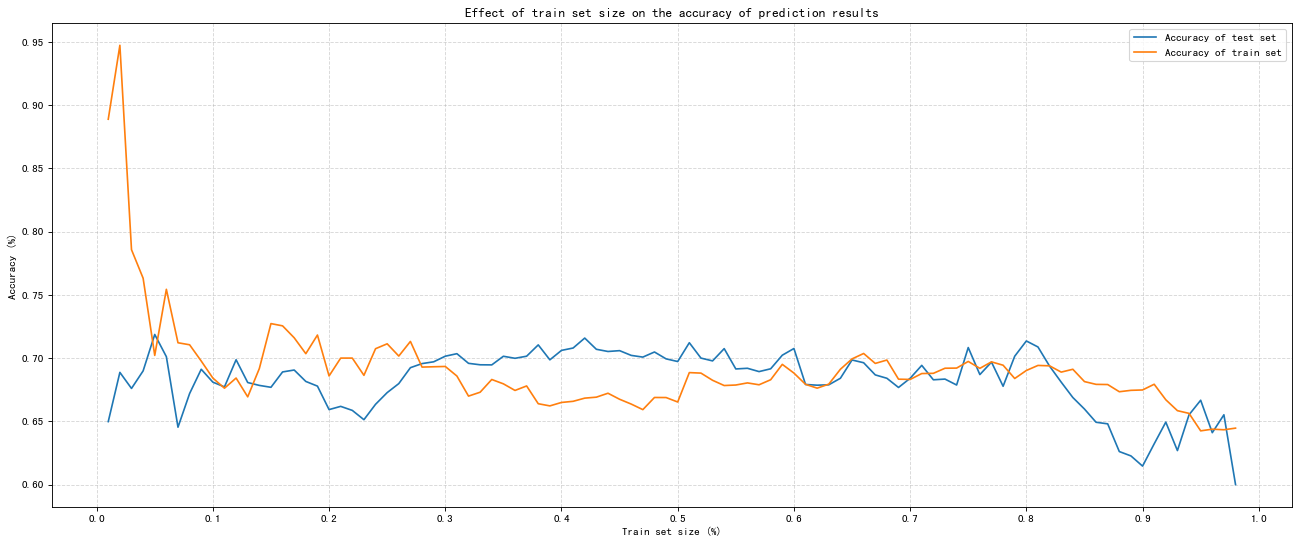

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes


# 读取数据并切分为特征值和目标值
# Считать данные и разделить их на собственные значения и целевые значения
data = pd.read_csv(filepath_or_buffer='./tic_tac_toe.txt')
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

# 转换为机器学习可识别的 int
# Преобразование в распознаваемый машинным обучением int
data_x = pd.DataFrame(data=data_x).replace(to_replace=['o', 'x', 'b'], value=[0, 1, 0.5]).values

# 测试数据集的比例从 1% 到 99%，间隔为 1%
# Тестовый набор данных масштабируется от 1% до 99% с интервалом в 1%.
arr_split = np.arange(start=0.01, stop= 0.99, step=0.01)
arr_test_score = []
arr_train_score = []
for test_size in arr_split:
    # 划分数据集
    # Разделите набор данных
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=(1 - test_size), random_state=90102)

    # 朴素贝叶斯算法估计器
    # Простой байесовский алгоритм оценки
    estimator = naive_bayes.BernoulliNB(alpha=1.0)
    estimator.fit(X=x_train, y=y_train)

    # 模型评估
    # Оценка модели
    test_score = estimator.score(x_test, y_test)
    arr_test_score.append(test_score)

    train_score = estimator.score(x_train, y_train)
    arr_train_score.append(train_score)
    

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_split, arr_test_score, label='Accuracy of test set')
plt.plot(arr_split, arr_train_score, label='Accuracy of train set')
plt.legend()
plt.title('Effect of train set size on the accuracy of prediction results')
plt.xticks(np.arange(start=0, stop=1.1, step=0.1))
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/

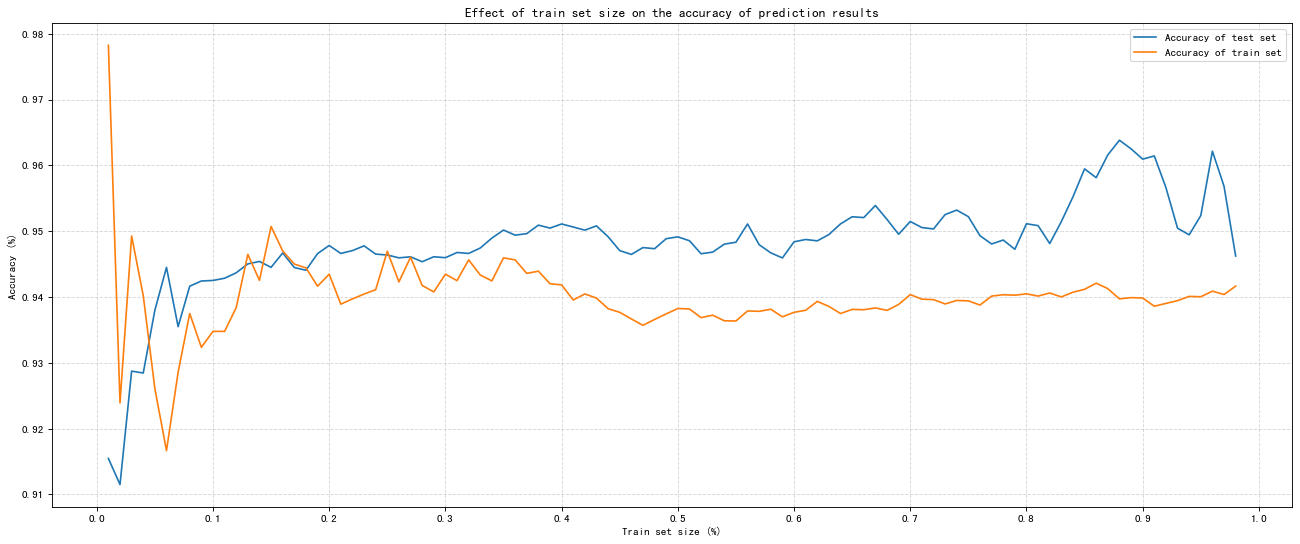

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes


# 读取数据并切分为特征值和目标值
# Считать данные и разделить их на собственные значения и целевые значения
data = pd.read_csv(filepath_or_buffer='./spam.csv')
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

# 测试数据集的比例从 1% 到 99%，间隔为 1%
# Тестовый набор данных масштабируется от 1% до 99% с интервалом в 1%.
arr_split = np.arange(start=0.01, stop= 0.99, step=0.01)
arr_test_score = []
arr_train_score = []
for test_size in arr_split:
    # 划分数据集
    # Разделите набор данных
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=(1 - test_size), random_state=90102)

    # 归一化
    # Нормализация
    transfer = preprocessing.StandardScaler()
    x_train = transfer.fit_transform(X=x_train)
    x_test = transfer.transform(X=x_test)

    # 朴素贝叶斯算法估计器
    # Простой байесовский алгоритм оценки
    estimator = naive_bayes.BernoulliNB(alpha=1.0)
    estimator.fit(X=x_train, y=y_train)

    # 模型评估
    # Оценка модели
    test_score = estimator.score(x_test, y_test)
    arr_test_score.append(test_score)

    train_score = estimator.score(x_train, y_train)
    arr_train_score.append(train_score)
    

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(arr_split, arr_test_score, label='Accuracy of test set')
plt.plot(arr_split, arr_train_score, label='Accuracy of train set')
plt.legend()
plt.title('Effect of train set size on the accuracy of prediction results')
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(start=0, stop=1.1, step=0.1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


2.	Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). Является ли построенный классификатор «хорошим»?

    根据正态分布生成100个具有两个特征X1和X2的点，使其中一部分和另一部分点（类-1和类1）具有参数：数学期望值X1，数学期望值X2，两个变量的标准差，对应于你的变体（在表中标明）。构建图表来说明数据。构建贝叶斯分类器，并使用不同的方法（准确性、误差矩阵、ROC和PR曲线）评估分类的质量。分类器的构造是否 "好"？

3.	Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. 

    a.	Постройте графики зависимости ошибки классификации от количества ближайших соседей.

    b.	Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет на точность классификации.

    c.	Определите, к какому типу стекла относится экземпляр с характеристиками:
    RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1



    为Glass训练集（glass.csv）建立一个基于k近邻法的分类器。看一下特征和类别的标题。在构建分类器之前，还要删除第一个特征Id号，它不带有任何信息负载。

    a.	绘制分类误差与近邻数量的函数。

    b.	确定合适的距离度量，研究距离度量的类型如何影响分类精度。

    c.	确定标本属于哪种类型的玻璃。

    RI=1.516 Na=11.7 Mg=1.01 Al=1.19 Si=72.59 K=0.43 Ca=11.44 Ba=0.02 Fe=0.1

In [38]:
%reset

Nothing done.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

Metric:  euclidean 	Best score is:  0.7037037037037037
Metric:  manhattan 	Best score is:  0.7407407407407407
Metric:  chebyshev 	Best score is:  0.6481481481481481


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

Metric:  minkowski 	Best score is:  0.7037037037037037


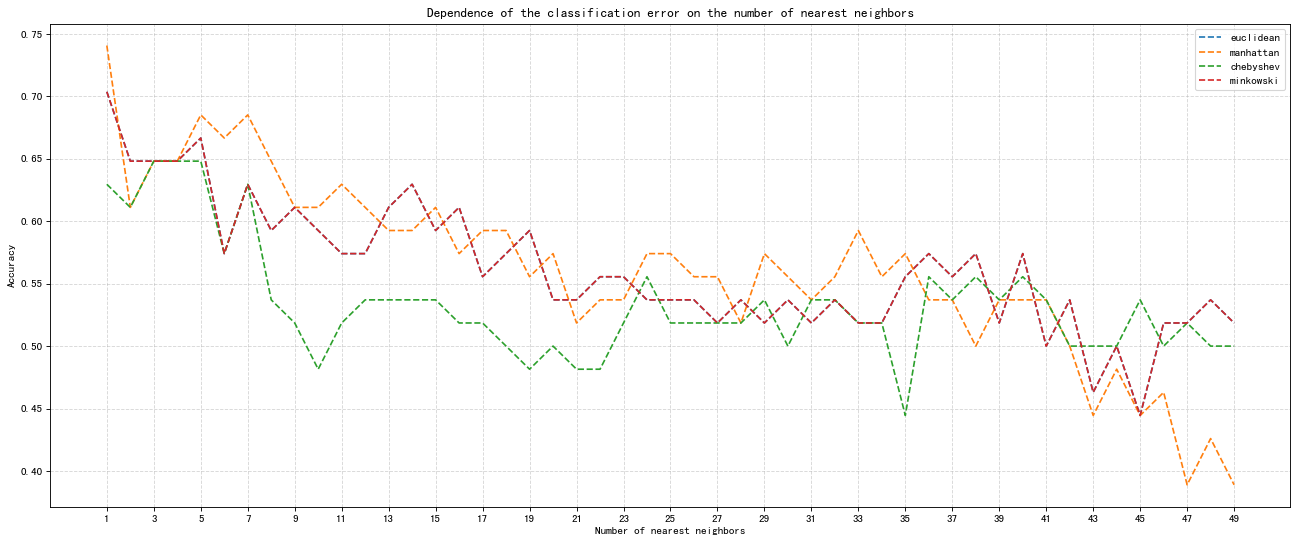

Predict:  [5]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. 读取数据
data = pd.read_csv(filepath_or_buffer='./glass.csv')
data_x = data.iloc[:, 1:-1]
data_y = data.iloc[:, -1:]

# 2. 划分数据集
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25 , random_state=90102)

# 3. 归一化
transfer = MinMaxScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 4. 绘制分类误差与近邻数量的函数
# 4. Постройте графики зависимости ошибки классификации от количества ближайших соседей
arr_n_neighbors = range(1, 50)
arr_metric = ('euclidean', 'manhattan', 'chebyshev', 'minkowski')
best_estimator = None
best_score = 0
plt.figure(figsize=(20, 8), dpi=80)
for this_metric in arr_metric:
    arr_score_n_nerghbors = []
    for n in arr_n_neighbors:
        estimator = KNeighborsClassifier(n_neighbors=n, metric=this_metric)
        estimator.fit(X=x_train, y=y_train)
        score = estimator.score(X=x_test, y=y_test)
        arr_score_n_nerghbors.append(score)

        # 5. 最佳准确率及最佳估计器
        if score > best_score:
            best_score = score
            best_estimator = estimator

    print('Metric: ', this_metric, '\tBest score is: ', max(arr_score_n_nerghbors))
    plt.plot(arr_n_neighbors, arr_score_n_nerghbors, linestyle='--', label=this_metric)

plt.legend()
plt.title('Dependence of the classification error on the number of nearest neighbors')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')
plt.xticks(arr_n_neighbors[::2])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 5. 使用上面求得的最佳估计器模型进行预测
data_predict = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]
data_predict = transfer.transform(data_predict)
predict = best_estimator.predict(X=data_predict)
print('Predict: ', predict)

4.	Постройте классификаторы на основе метода опорных векторов для наборов данных из файлов svmdataN.txt и svmdataNtest.txt, где N –  индекс задания:

    a.	Постройте алгоритм метода опорных векторов с линейным ядром. Визуализируйте разбиение пространства признаков на области с помощью полученной модели (пример визуализации). Выведите количество полученных опорных векторов, а также матрицу ошибок классификации на обучающей и тестовой выборках.

    b.	Постройте алгоритм метода опорных векторов с линейным ядром. Добейтесь нулевой ошибки сначала на обучающей выборке, а затем на тестовой, путем изменения штрафного параметра. Выберите оптимальное значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на обучающей выборке?

    c.	Постройте алгоритм метода опорных векторов, используя различные ядра (линейное, полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

    d.	Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

    e.	Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Изменяя значение параметра ядра (гамма), продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.




为来自svmdataN.txt和svmdataNtest.txt文件的数据集建立基于参考向量法的分类器，其中N为工作索引。

a.	构建一个具有线性核的支持向量法算法。使用所产生的模型将特征空间划分为区域的情况可视化（可视化示例）。输出获得的参考向量的数量，以及训练和测试样本的分类误差矩阵。

b.	构建一个具有线性内核的参考向量法的算法。首先在训练样本上实现零误差，然后通过改变惩罚参数在测试样本上实现零误差。为这个参数选择一个最佳值并解释你的选择。是否一定要在训练样本上实现误差最小化？

c.	使用不同的核（线性、1-5次方的多项式、西格玛函数、高斯）构建一个参考向量法的算法。利用获得的模型将特征空间划分为多个区域进行可视化。得出结论。

d.	使用不同的核（1-5次方的多项式、正弦函数、高斯）构建一个支持向量方法算法。利用所得到的模型将特征空间划分为多个区域，实现可视化。得出结论。

e.	使用不同的核（1-5次方的多项式、正弦函数、高斯）构建一个支持向量方法算法。通过改变内核参数（gamma）的值，展示过度训练的效果，同时将特征空间划分为多个区域的情况可视化。


5.	Постройте классификаторы для различных данных на основе деревьев решений:

    a.	Загрузите набор данных Glass из файла glass.csv.
    Постройте дерево классификации для модели, предсказывающей тип (Type) по остальным признакам. Визуализируйте результирующее дерево решения. Дайте интерпретацию полученным результатам. Является ли построенное дерево избыточным? Исследуйте зависимость точности классификации от критерия расщепления, максимальной глубины дерева и других параметров по вашему усмотрению.

    b.	Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.


为不同的数据构建基于决策树的分类器。

    a. 从glass.csv文件中加载Glass数据集。
    为模型构建一个分类树，从其余的特征中预测类型（Type）。将产生的决策树可视化。对结果作出解释。这棵树是多余的吗？研究分类精度对分割标准、树的最大深度和其他参数的依赖性，由你决定。

    b. 从spam7.csv文件中加载spam7数据集。构建参数yesno的最佳分类树。 解释如何选择参数。将产生的决策树可视化。识别最具影响力的特征。评估分类的质量。




6.	Загрузите набор данных из файла bank_scoring_train.csv. Это набор финансовых данных, характеризующий физических лиц. Целевым столбцом является «SeriousDlqin2yrs», означающий, ухудшится ли финансовая ситуация у клиента. Постройте систему по принятию решения о выдаче или невыдаче кредита физическому лицу. Сделайте как минимум 2 варианта системы на основе различных классификаторов. Подберите подходящую метрику качества работы системы исходя из специфики задачи и определите, принятие решения какой системой сработало лучше на bank_scoring_test.csv.


从文件bank_scoring_train.csv中加载数据集。这是一组描述个人的财务数据。目标栏是 "SeriousDlqin2yrs"，意味着客户的财务状况是否会恶化。建立一个决定是否给予个人信贷的系统。根据不同的限定条件，至少制作2个版本的系统。根据任务的具体情况选择一个合适的系统性能指标，并确定哪个系统的决策在bank_scoring_test.csv上效果更好。